# ArbPredict: Evaluating Data and Statistical Analysis

During this notebook we will:
* Present the distributions
* Confirm outliers are removed
* Begin hypothese testing on features.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.formula.api import ols
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# from sklearn.dummy import DummyRegressor
# from sklearn import linear_model
# from sklearn import metrics
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.preprocessing import StandardScaler
# from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import random
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 80)

%matplotlib inline

In [2]:
df = pd.read_csv('rookie.csv')
print(df.shape)
df.head()

(994, 72)


,Unnamed: 0,playerID,nameFirst,nameLast,weight,height,debut,finalGame,awardWinner,voteWinner,G,AB,R,H,DBL,TPL,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,TB,SLG,OPS,salary,seasons,G_p,W_p,L_p,GS_p,CG,SHO_p,SV_p,IPouts,ER_p,HR_p,SO_p,IBB_p,BAOpp,ERA,WP,HBP_p,BK,BFP,GF,R_p,SH_p,SF_p,GIDP_p,WHIP,IP,BB_p,throws_R,bats_L,bats_R,prim_pos_2B,prim_pos_3B,prim_pos_C,prim_pos_OF,prim_pos_P,prim_pos_SS,throws,bats,prim_pos
0,0,aardsda01,David,Aardsma,215.0,75.0,2004-04-06,2015-08-23,0,0,27.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419000.0,7.0,27.000000,2.000000,0.333333,0.0,0.0,0.0,0.0,96.000000,18.333333,4.666667,30.000000,1.000000,0.310333,5.742511,1.000000,1.333333,0.000000,145.666667,7.000000,19.000000,1.000000,1.666667,1.333333,1.948782,32.000000,18.333333,1,0,1,0,0,0,0,1,0,R,R,P
1,1,abadfe01,Fernando,Abad,235.0,74.0,2010-07-28,2021-10-01,0,0,29.333333,2.666667,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.047619,0.047619,0.333333,0.047619,0.095238,1087500.0,5.0,29.333333,0.333333,3.666667,2.0,0.0,0.0,0.0,84.666667,16.000000,4.666667,21.666667,0.333333,0.279000,5.083699,1.333333,1.333333,0.000000,127.666667,5.000000,17.000000,1.000000,1.333333,1.333333,1.511177,28.222222,11.000000,0,1,0,0,0,0,0,1,0,L,L,P
2,2,abreuto01,Tony,Abreu,200.0,70.0,2007-05-22,2014-07-28,0,0,48.666667,122.333333,11.666667,30.666667,8.333333,0.666667,1.000000,10.333333,0.666667,0.666667,4.666667,23.333333,0.333333,1.000000,0.000000,2.000000,4.333333,0.335772,0.251415,53.333333,0.379815,0.715586,745000.0,4.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,R,B,3B
3,3,accarje01,Jeremy,Accardo,195.0,72.0,2005-05-04,2012-09-27,0,0,52.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.333333,0.166667,0.333333,1080000.0,5.0,52.333333,2.333333,4.333333,0.0,0.0,0.0,11.0,166.000000,23.333333,4.333333,42.333333,2.666667,0.336667,5.652214,1.666667,1.333333,0.666667,232.000000,27.333333,24.666667,0.666667,2.000000,3.000000,1.716016,55.333333,17.666667,1,0,1,0,0,0,0,1,0,R,R,P
4,4,ackledu01,Dustin,Ackley,205.0,73.0,2011-06-17,2016-05-29,0,1,118.666667,441.333333,54.333333,108.333333,18.666667,3.666667,7.333333,39.000000,7.000000,2.000000,45.333333,91.666667,3.000000,0.333333,1.666667,1.666667,4.000000,0.320469,0.250526,186.000000,0.431767,0.752236,2600000.0,5.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,1,0,0,0,0,0,R,L,2B


Now to get a better sense of the data itself.

In [3]:
df.groupby('prim_pos').salary.max()

prim_pos
1B    15000000.0
2B     6000000.0
3B     8250000.0
C     12500000.0
OF    16083333.0
P     14000000.0
SS     6000000.0
Name: salary, dtype: float64

In [4]:
df.groupby('prim_pos').salary.mean()

prim_pos
1B    3.223106e+06
2B    2.213895e+06
3B    2.435168e+06
C     1.907964e+06
OF    2.626872e+06
P     2.314292e+06
SS    2.055255e+06
Name: salary, dtype: float64

Distribution of salaries by primary position.

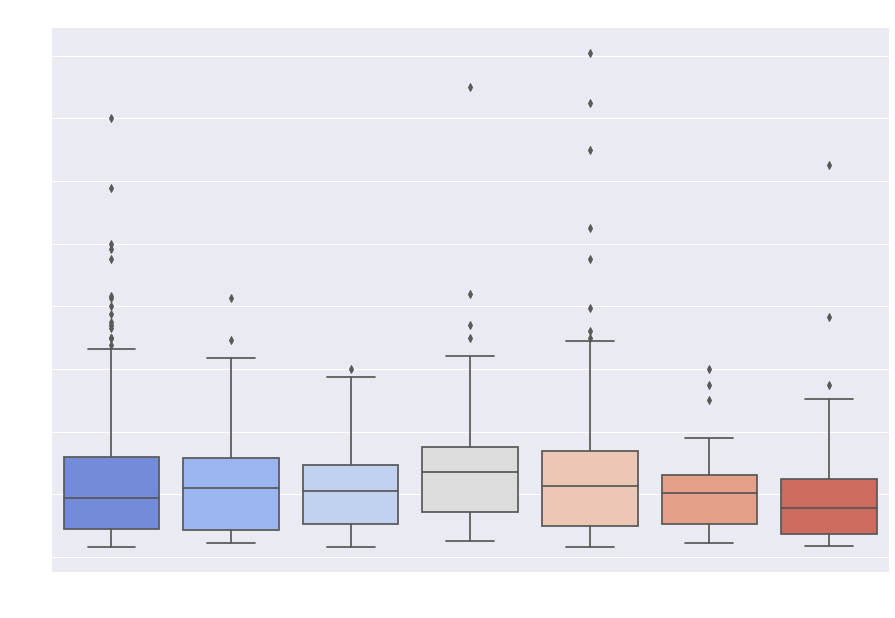

In [5]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x='prim_pos', y='salary', data=df, palette='coolwarm')

ax.set_ylabel('Salary in Millions', fontsize=14)
ax.set_xlabel('Primary Position', fontsize=14)
ax.set_title('Distribution of Salaries by Primary Position', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/sal_primpos.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

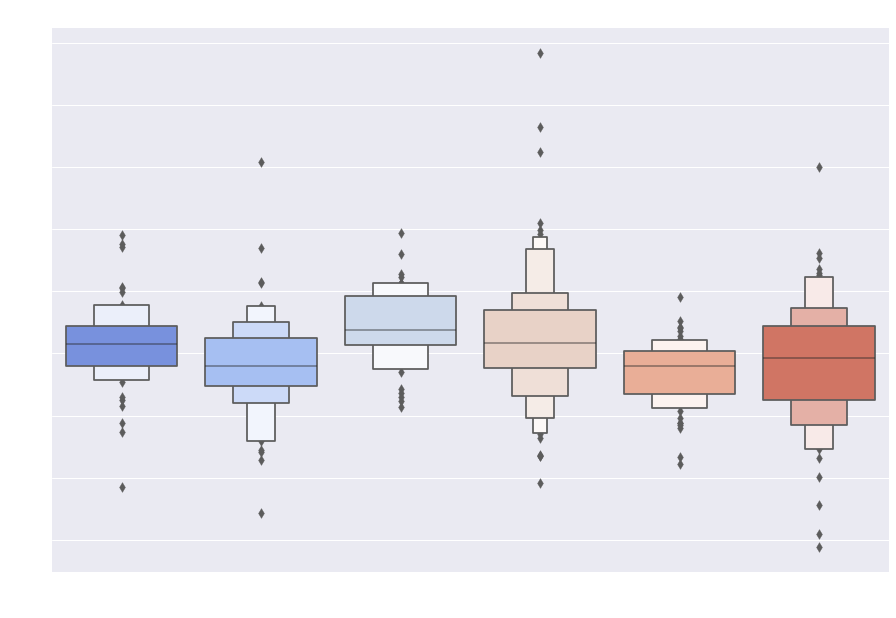

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
df_batters = df[df['prim_pos']!='P']
sns.boxenplot(x = 'prim_pos', y = 'OPS', data = df_batters, palette='coolwarm')

ax.set_ylabel('On-Base plus Slugging', fontsize=14)
ax.set_xlabel('Primary Position', fontsize=14)
ax.set_title('Distribution of OPS by Primary Position', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/OPS_primpos.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

Now to investigate if there is a significant difference in terms of Arb salary depending on handedness of the batter or pitcher.

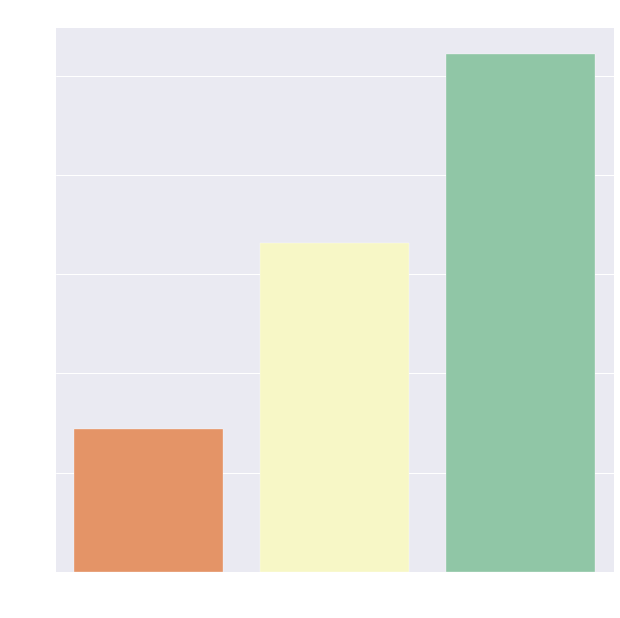

In [7]:
fig, ax = plt.subplots(figsize = (10,10))

sns.countplot(x = 'bats', data = df_batters, palette = 'Spectral')

ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Handedness (B)', fontsize=14)
ax.set_title('Count of Left vs Right Handed Batters', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/Right_Left_Batters.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

  bats       OPS
0    B  0.763920
1    L  0.835191
2    R  0.807215


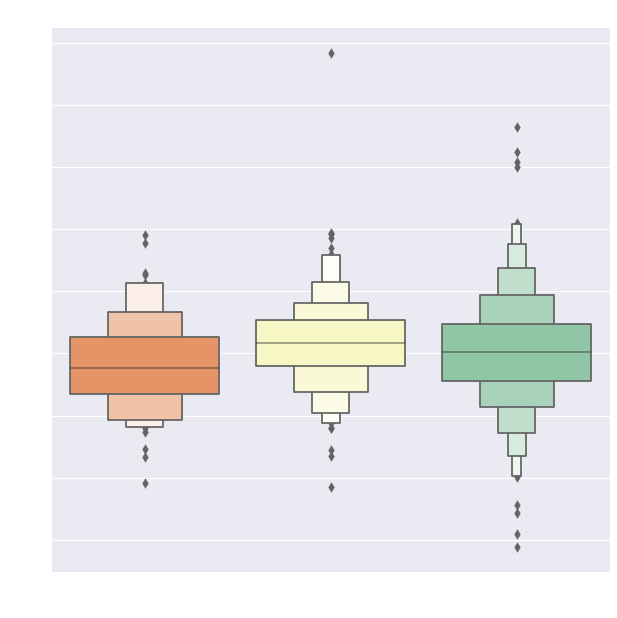

In [8]:
x = df_batters.groupby('bats').OPS.mean().reset_index()
print(x)

fig,ax = plt.subplots(figsize = (10,10))

sns.boxenplot(x = 'bats', y = 'OPS', data = df_batters, palette = 'Spectral')

ax.set_ylabel('OPS', fontsize=14)
ax.set_xlabel('Handedness (B)', fontsize=14)
ax.set_title('OPS of Left vs Right Handed Batters', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/Right_Left_Batters_OPS.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

  bats        salary
0    B  1.900367e+06
1    L  2.701593e+06
2    R  2.366571e+06


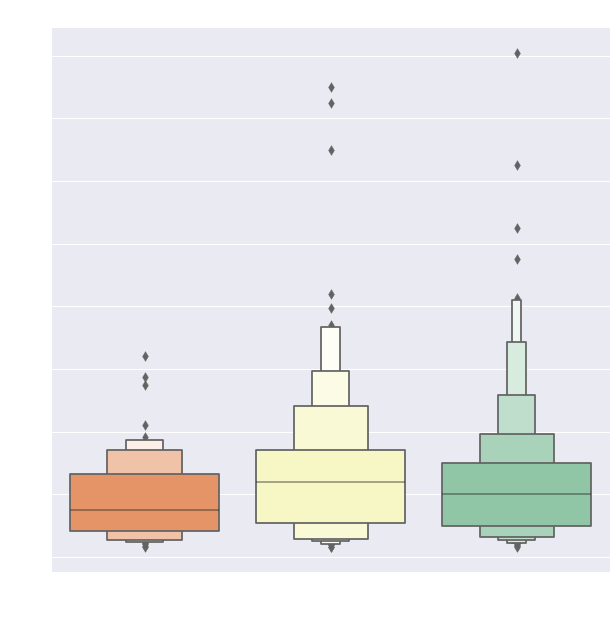

In [9]:
x = df_batters.groupby('bats').salary.mean().reset_index()
print(x)

fig,ax = plt.subplots(figsize = (10,10))

sns.boxenplot(x = 'bats', y = 'salary', data = df_batters, palette = 'Spectral')

ax.set_ylabel('Salary', fontsize=14)
ax.set_xlabel('Handedness (B)', fontsize=14)
ax.set_title('Salaries of Left vs Right Handed Batters', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/Right_Left_Batters_Salary.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

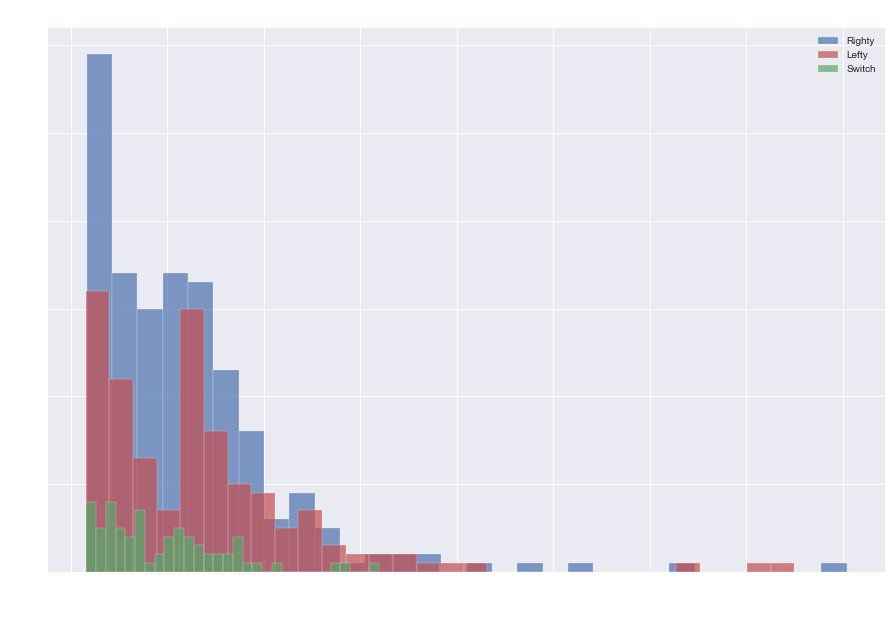

In [10]:
fig, ax = plt.subplots(figsize = (15,10))

df_batters.salary[df.bats_R == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Righty')
df_batters.salary[df.bats_L == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Lefty', color = 'r')
df_batters.salary[(df.bats_R == 0) & (df.bats_L == 0)].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Switch', color = 'g')
plt.legend()
plt.title('Distribution of Salary per Handedness (B) in Population', fontsize = 20)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/Batters_Salary_Distribution.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

In [11]:
df_batters['salary_log'] = np.log(df_batters['salary'])
df['salary_log'] = np.log(df['salary'])

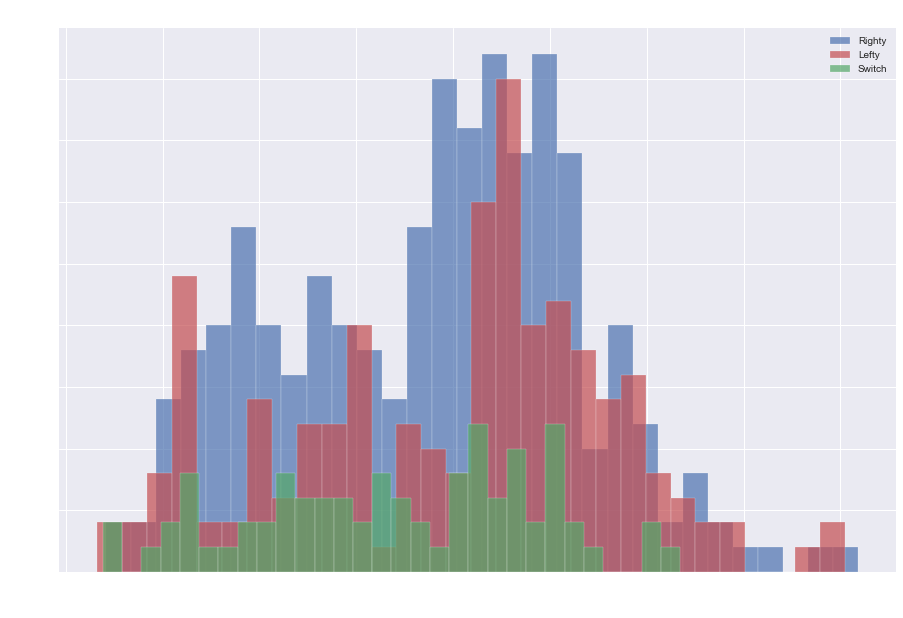

In [12]:
fig, ax = plt.subplots(figsize = (15,10))

df_batters.salary_log[df.bats_R == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Righty')
df_batters.salary_log[df.bats_L == 1].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Lefty', color = 'r')
df_batters.salary_log[(df.bats_R == 0) & (df.bats_L == 0)].plot(kind = 'hist', bins = 30, alpha = 0.7, label = 'Switch', color = 'g')
plt.legend()
plt.title('Distribution of Log Salary per Handedness (B) in Population', fontsize = 20)
plt.xlabel('Log Salary', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/Batters_LogSalary_Distribution.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

### Statistical Tests

This section contains tests on the data to ensure relevance to the questions at hand.

##### Test 1: Two sample Proportion Z-test

Investigating whether there is a significant difference between Arb salaries of batters based on handedness.

In [13]:
df_batters.salary_log.mean()

14.400079889869593

In [14]:
df_batters.salary_log.std()

0.7885227406048726

In [15]:
df_left = df_batters[df_batters.bats == 'L']
df_right = df_batters[df_batters.bats == 'R']

In [16]:
df_high_left = df_left[df_left.salary_log >= 15]
df_high_right = df_right[df_right.salary_log >=15]

Null: There is no significant difference between the two distributions.

Alternate: There is reasonable evidence that the distributions are statistically different. 

In [17]:
z, p = sms.proportion.proportions_ztest([len(df_high_left), len(df_high_right)], [len(df_left), len(df_right)])
if p<=0.05:
    print('The p-value of %.3f suggests a rejection of the null hypothesis in favor of the Alternate.'%(p))
else:
    print('The p-value of %.3f fails to reject the Null hypothesis.'%(p))

The p-value of 0.062 fails to reject the Null hypothesis.


Based on our test, there is no significant difference between the high end Arb salaries of Righty and Lefty batters.

##### Test 2: ANOVA

In [18]:
anovaPrimPos = ols('salary_log~prim_pos', data = df).fit()
anovaPrimPos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             salary_log   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.413
Date:                Mon, 03 Jan 2022   Prob (F-statistic):             0.0254
Time:                        19:51:58   Log-Likelihood:                -1178.1
No. Observations:                 994   AIC:                             2370.
Df Residuals:                     987   BIC:                             2405.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         14.6883      0.121    121.250      0.000      14.451      14.926
prim_pos[T.2B]    -0.3159      0.156     -2.029      0.043      -0.621      -0.010
prim_pos[T.3B]    -0.2849      0.162     -1.762      0.078      -0.602       0.032
prim_pos[T.C]     -0.5123      0.149     -3.432      0.001      -0.805      -0.219
prim_pos[T.OF]    -0.2331      0.134     -1.737      0.083      -0.497       0.030
prim_pos[T.P]     -0.3401      0.126     -2.693      0.007      -0.588      -0.092
prim_pos[T.SS]    -0.3291      0.157     -2.095      0.036      -0.637      -0.021
==============================================================================
Omnibus:                       49.829   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.958
Skew:                          -0.120   Prob(JB):                     1.71e-05
Kurtosis:                       2.312   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
stats.f_oneway(df['salary_log'][df['prim_pos'] == 'P'],
                df['salary_log'][df['prim_pos'] == 'C'], 
                df['salary_log'][df['prim_pos'] == '1B'],
                df['salary_log'][df['prim_pos'] == '2B'],
                df['salary_log'][df['prim_pos'] == '3B'],
                df['salary_log'][df['prim_pos'] == 'SS'],
                df['salary_log'][df['prim_pos'] == 'OF'],
                )

F_onewayResult(statistic=2.413477696498398, pvalue=0.025427681817342018)

This tells us that the samples probably did not come from the same distribution. Further tests will need to be run to understand which positions stand out.

In [25]:
positions = ['P','C','1B','2B','3B','SS','OF']
primPosTests = dict()
differentDists = []

for op1 in positions:
    for op2 in positions:
        if op1!=op2:
            stat, p = ttest_ind(df.salary_log[df['prim_pos'] == op1], df.salary_log[df['prim_pos'] == op2])
            primPosTests[(op1,op2)]=('stat=%.3f, p=%.3f' % (stat, p))
            if p > 0.05:
                print(op1 + ' and ' + op2 +' probably have the same distribution')
            else:
                print(op1 + ' and ' + op2 +' probably have different distributions')
                differentDists.append((op1,op2))

P and C probably have the same distribution
P and 1B probably have different distributions
P and 2B probably have the same distribution
P and 3B probably have the same distribution
P and SS probably have the same distribution
P and OF probably have the same distribution
C and P probably have the same distribution
C and 1B probably have different distributions
C and 2B probably have the same distribution
C and 3B probably have the same distribution
C and SS probably have the same distribution
C and OF probably have different distributions
1B and P probably have different distributions
1B and C probably have different distributions
1B and 2B probably have different distributions
1B and 3B probably have the same distribution
1B and SS probably have different distributions
1B and OF probably have the same distribution
2B and P probably have the same distribution
2B and C probably have the same distribution
2B and 1B probably have different distributions
2B and 3B probably have the same dis

In [21]:
differentDists

[('P', '1B'),
 ('C', '1B'),
 ('C', 'OF'),
 ('1B', 'P'),
 ('1B', 'C'),
 ('1B', '2B'),
 ('1B', 'SS'),
 ('2B', '1B'),
 ('SS', '1B'),
 ('OF', 'C')]

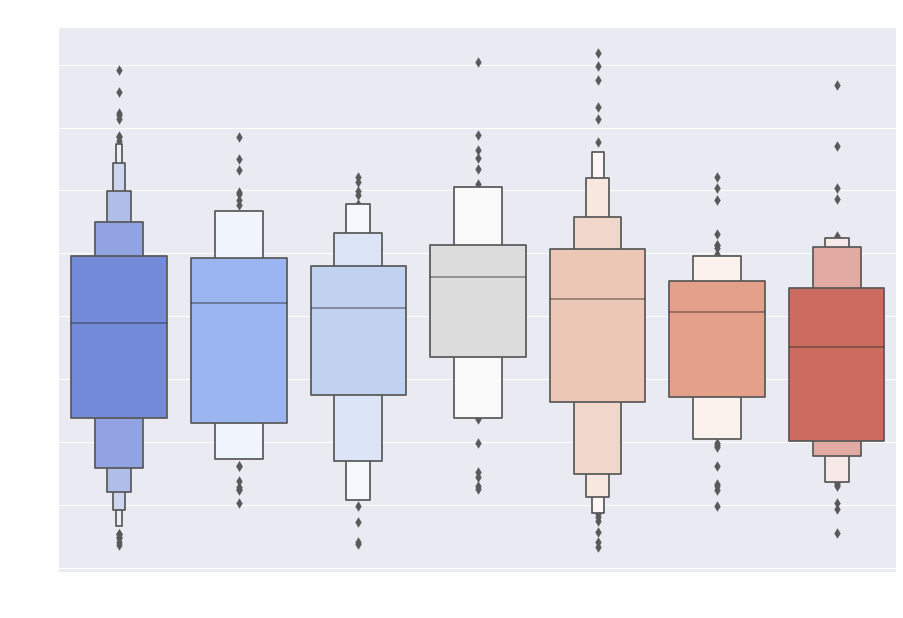

In [27]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxenplot(x='prim_pos', y='salary_log', data=df, palette='coolwarm')

ax.set_ylabel('Log Salary in Millions', fontsize=14)
ax.set_xlabel('Primary Position', fontsize=14)
ax.set_title('Distribution of Log Salaries by Primary Position', fontsize=20)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.savefig('C:/Python310/Projects/Figures/sal_log_primpos.png', dpi=300,
            bbox_inches='tight', padding_inches=4, transparent=True)

##### Test 3: Two Sample T-Test

Tests whether the means of two independent samples are significantly different.

Assumptions:

    Observations in each sample are independent and identically distributed.
    Observations in each sample are normally distributed.
    Observations in each sample have the same variance.

Interpretation:

    H0: The means of the samples are equal.
    H1: The means of the samples are unequal.

In [22]:
stats.ttest_ind(df_batters.salary_log[df_batters.bats == 'L'], df_batters.salary_log[df_batters.bats == 'R'])

Ttest_indResult(statistic=1.132148888772934, pvalue=0.25821019794888944)

###### We fail to reject the null hypothesis.

##### Visualizations

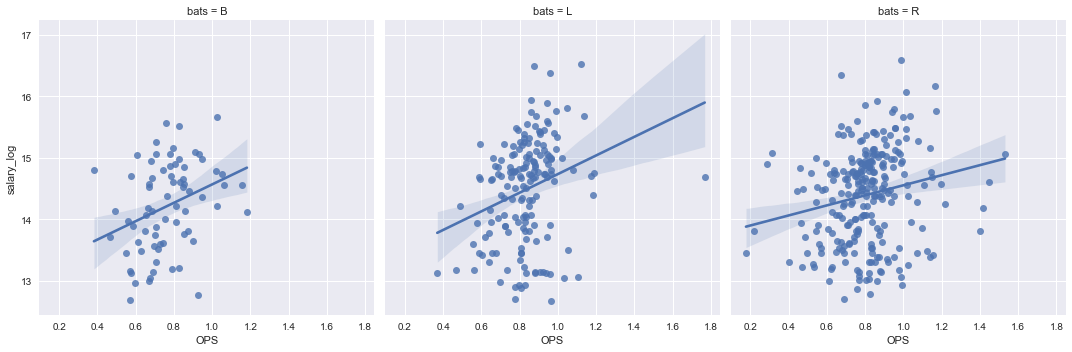

In [23]:
sns.lmplot(x='OPS', y='salary_log', data=df_batters, col='bats')

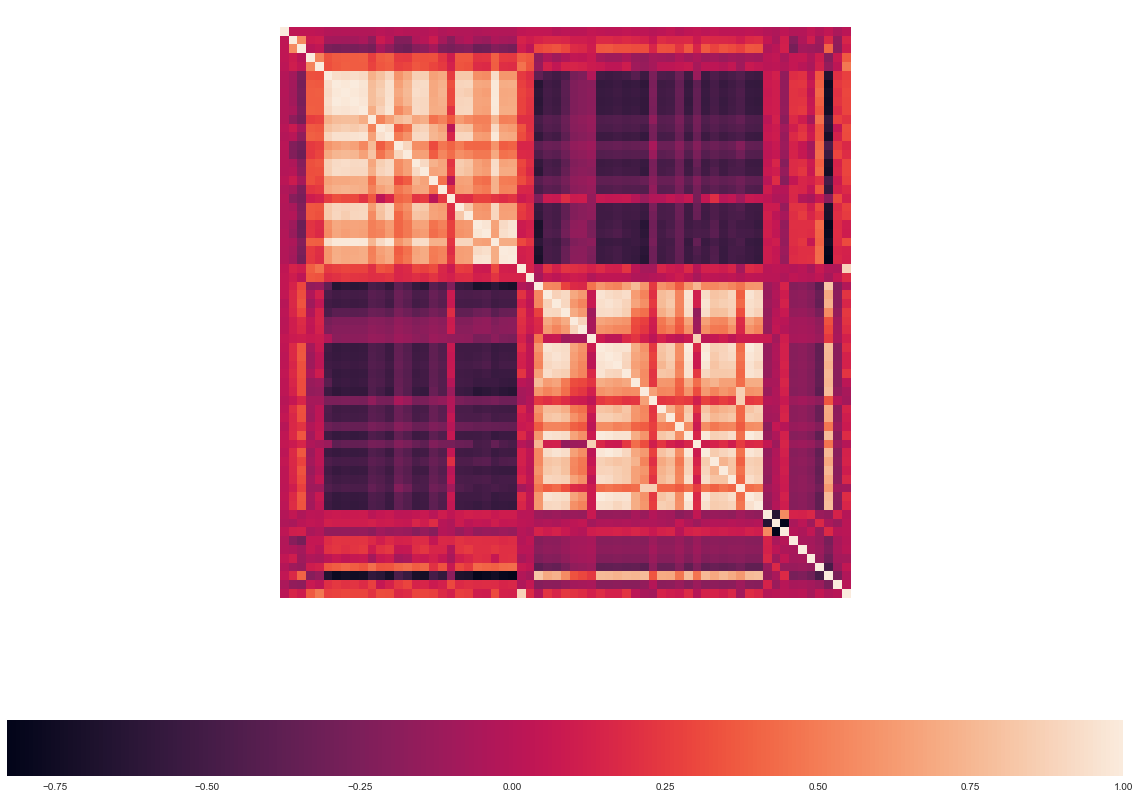

In [24]:
fig,ax = plt.subplots(figsize = (20,15))

sns.heatmap(df.corr(), cbar_kws= {'orientation': 'horizontal'} ,square=True)
plt.title("Correlation Heatmap", fontsize = 18)

#plt.legend()
#plt.title('Distribution of Log Salary per Handedness (B) in Population', fontsize = 20)
#plt.xlabel('Log Salary', fontsize = 14)
#plt.ylabel('Frequency', fontsize = 14)

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
